사용 중인 디바이스: cuda
데이터 생성 중...
총 데이터 크기: 960
라벨 분포:
label
1    440
0    420
2    100
Name: count, dtype: int64
어휘집 크기: 87

모델 파라미터 수: 275,375

모델 훈련 시작...
Epoch [1/15]
Train Loss: 0.8176, Val Accuracy: 0.8958
Learning Rate: 0.001000
--------------------------------------------------
Epoch [2/15]
Train Loss: 0.2007, Val Accuracy: 1.0000
Learning Rate: 0.001000
--------------------------------------------------
Epoch [3/15]
Train Loss: 0.0439, Val Accuracy: 1.0000
Learning Rate: 0.000500
--------------------------------------------------
Epoch [4/15]
Train Loss: 0.0046, Val Accuracy: 1.0000
Learning Rate: 0.000500
--------------------------------------------------
Epoch [5/15]
Train Loss: 0.0025, Val Accuracy: 1.0000
Learning Rate: 0.000500
--------------------------------------------------
Epoch [6/15]
Train Loss: 0.0009, Val Accuracy: 1.0000
Learning Rate: 0.000250
--------------------------------------------------
Epoch [7/15]
Train Loss: 0.0007, Val Accuracy: 1.0000
Learning Rate: 0.00

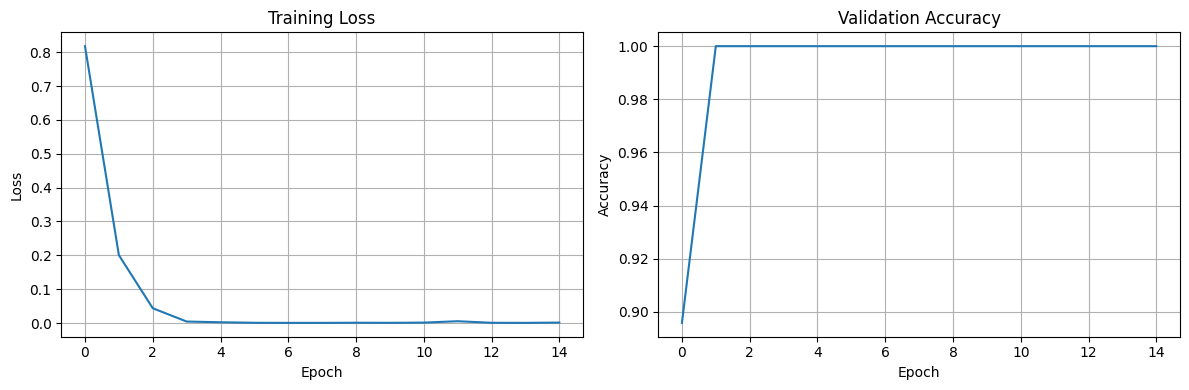


=== 최종 평가 결과 ===
정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1 점수: 1.0000


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.can

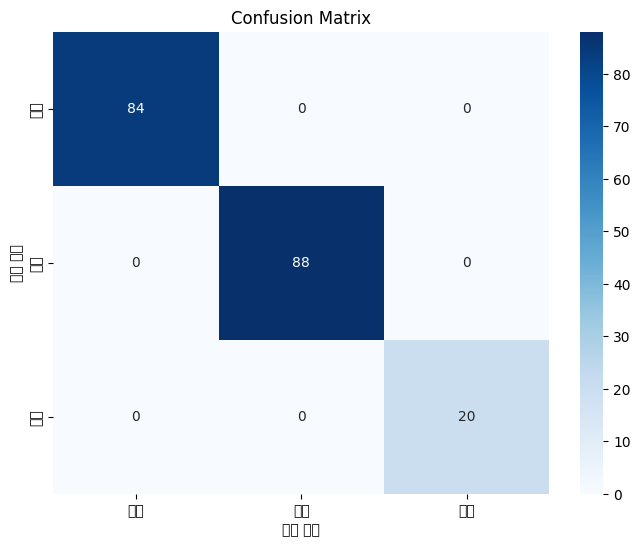

모델이 'cnn_sentiment_model.pth'에 저장되었습니다.

=== 추론 테스트 ===
텍스트: 이 제품 정말 좋아요!
예측: 긍정 (신뢰도: 1.000)
--------------------------------------------------
텍스트: 완전 실망했습니다.
예측: 긍정 (신뢰도: 0.850)
--------------------------------------------------
텍스트: 그냥 보통이에요.
예측: 부정 (신뢰도: 0.568)
--------------------------------------------------
텍스트: 최고의 선택이었어요!
예측: 긍정 (신뢰도: 1.000)
--------------------------------------------------
텍스트: 별로 추천하지 않아요.
예측: 부정 (신뢰도: 1.000)
--------------------------------------------------
텍스트: 괜찮은 편인 것 같아요.
예측: 중립 (신뢰도: 1.000)
--------------------------------------------------
텍스트: 너무 마음에 들어요!
예측: 긍정 (신뢰도: 1.000)
--------------------------------------------------
텍스트: 돈이 아까워요.
예측: 부정 (신뢰도: 1.000)
--------------------------------------------------
텍스트: 만족스러운 구매였습니다.
예측: 부정 (신뢰도: 0.995)
--------------------------------------------------
텍스트: 다음에도 또 올게요!
예측: 부정 (신뢰도: 0.996)
--------------------------------------------------

=== 모델 아키텍처 ===
1. 임베딩 레이어: 단어 → 벡터 변환
2. CNN 레이어들:
   - Conv1D

In [7]:
# =============================================================================
# 예제 1: CNN 기반 감정분석 모델 (API 없이, 마스크 문제 완전 해결)
# =============================================================================

# 1. 필요한 라이브러리 설치 및 임포트
!pip install torch pandas scikit-learn matplotlib seaborn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from collections import Counter

# 2. GPU 설정 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"사용 중인 디바이스: {device}")

# 3. 샘플 데이터 생성 (더 많고 다양한 데이터)
def create_extensive_sample_data():
    positive_samples = [
        "이 영화 정말 재미있어요!", "최고의 서비스였습니다", "정말 훌륭한 경험이었습니다",
        "추천하고 싶어요", "매우 만족스럽습니다", "완벽한 선택이었어요",
        "기대 이상이었습니다", "놀라운 품질이에요", "정말 좋아요",
        "환상적인 경험이었습니다", "최고예요", "대단해요", "멋진 제품이네요",
        "훌륭한 서비스입니다", "완전 만족해요", "좋은 선택이었어요",
        "감동적이었습니다", "뛰어난 품질이에요", "정말 좋은 경험이었어요",
        "너무 마음에 들어요", "완벽해요", "최고의 품질입니다"
    ]

    negative_samples = [
        "완전 실망이에요", "너무 지루해요", "다시는 안 올 것 같아요",
        "최악의 경험이었어요", "별로예요", "돈 아까워요", "시간 낭비였어요",
        "형편없어요", "너무 안 좋아요", "실망스러워요", "품질이 떨어져요",
        "서비스가 엉망이에요", "추천하지 않아요", "정말 나빠요",
        "기대에 못 미쳐요", "문제가 많아요", "불만족스러워요",
        "개선이 필요해요", "아쉬워요", "별로 좋지 않아요", "후회되네요"
    ]

    neutral_samples = [
        "그저 그런 것 같아요", "괜찮은 편이에요", "보통이에요", "나쁘지 않아요",
        "평범해요", "그런대로 괜찮아요", "무난한 선택이에요", "적당해요",
        "보통 수준이에요", "그럭저럭 괜찮아요"
    ]

    # 데이터 확장
    data = {
        'text': positive_samples * 20 + negative_samples * 20 + neutral_samples * 10,
        'label': [1] * (len(positive_samples) * 20) + [0] * (len(negative_samples) * 20) + [2] * (len(neutral_samples) * 10)
    }

    return pd.DataFrame(data)

# 4. 간단한 토크나이저 구현
class SimpleTokenizer:
    def __init__(self, vocab_size=5000):
        self.vocab_size = vocab_size
        self.word_to_id = {}
        self.id_to_word = {}
        self.vocab_built = False

    def build_vocab(self, texts):
        """텍스트 목록으로부터 어휘집 구축"""
        word_freq = Counter()

        for text in texts:
            words = self.tokenize(text)
            word_freq.update(words)

        # 특수 토큰 추가
        self.word_to_id = {
            '[PAD]': 0,
            '[UNK]': 1
        }

        # 빈도순으로 어휘 추가
        for word, freq in word_freq.most_common(self.vocab_size - 2):
            if word not in self.word_to_id:
                self.word_to_id[word] = len(self.word_to_id)

        # 역방향 매핑 생성
        self.id_to_word = {id: word for word, id in self.word_to_id.items()}
        self.vocab_built = True

        print(f"어휘집 크기: {len(self.word_to_id)}")

    def tokenize(self, text):
        """간단한 토큰화"""
        # 한국어와 영어 모두 처리
        text = re.sub(r'[^\w\s가-힣]', '', text.lower())
        return text.split()

    def encode(self, text, max_length=64):
        """텍스트를 토큰 ID로 변환"""
        words = self.tokenize(text)

        # 단어를 ID로 변환
        token_ids = []
        for word in words[:max_length]:
            token_ids.append(self.word_to_id.get(word, self.word_to_id['[UNK]']))

        # 패딩
        while len(token_ids) < max_length:
            token_ids.append(self.word_to_id['[PAD]'])

        return token_ids[:max_length]

# 5. CNN 기반 감정분석 모델 (마스크 없음, 매우 안정적)
class CNNSentimentModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_filters=100, filter_sizes=[3, 4, 5], num_classes=3, max_length=64):
        super(CNNSentimentModel, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.dropout = nn.Dropout(0.3)

        # 다양한 크기의 컨볼루션 필터
        self.convs = nn.ModuleList([
            nn.Conv1d(embed_dim, num_filters, kernel_size=k)
            for k in filter_sizes
        ])

        # 분류 헤드
        self.classifier = nn.Sequential(
            nn.Linear(len(filter_sizes) * num_filters, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

        self.max_length = max_length

    def forward(self, input_ids):
        # 임베딩: [batch_size, seq_len] -> [batch_size, seq_len, embed_dim]
        x = self.embedding(input_ids)
        x = self.dropout(x)

        # CNN을 위해 차원 변경: [batch_size, embed_dim, seq_len]
        x = x.transpose(1, 2)

        # 각 필터 크기별로 컨볼루션 적용
        conv_outputs = []
        for conv in self.convs:
            # 컨볼루션 + ReLU
            conv_out = torch.relu(conv(x))  # [batch_size, num_filters, conv_seq_len]

            # 글로벌 맥스 풀링
            pooled = torch.max(conv_out, dim=2)[0]  # [batch_size, num_filters]
            conv_outputs.append(pooled)

        # 모든 필터의 출력을 연결
        concatenated = torch.cat(conv_outputs, dim=1)  # [batch_size, len(filter_sizes) * num_filters]

        # 분류
        logits = self.classifier(concatenated)

        return logits

# 6. 데이터셋 클래스 (매우 간단)
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # 토큰화 (마스크 없음)
        input_ids = self.tokenizer.encode(text, max_length=self.max_length)

        return {
            'input_ids': torch.tensor(input_ids, dtype=torch.long),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 7. 훈련 함수
def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=1e-3):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # 훈련 모드
        model.train()
        total_train_loss = 0

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()

        # 검증
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids)
                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total
        avg_train_loss = total_train_loss / len(train_loader)

        train_losses.append(avg_train_loss)
        val_accuracies.append(accuracy)

        scheduler.step()

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {avg_train_loss:.4f}, Val Accuracy: {accuracy:.4f}')
        print(f'Learning Rate: {scheduler.get_last_lr()[0]:.6f}')
        print('-' * 50)

    return train_losses, val_accuracies

# 8. 데이터 준비 및 전처리
print("데이터 생성 중...")
df = create_extensive_sample_data()
print(f"총 데이터 크기: {len(df)}")
print(f"라벨 분포:\n{df['label'].value_counts()}")

# 라벨 매핑 (0: 부정, 1: 긍정, 2: 중립)
label_map = {0: '부정', 1: '긍정', 2: '중립'}

# 9. 토크나이저 구축
tokenizer = SimpleTokenizer(vocab_size=3000)
tokenizer.build_vocab(df['text'].tolist())

# 10. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df['text'].values, df['label'].values,
    test_size=0.2, random_state=42, stratify=df['label']
)

# 11. 데이터셋 및 데이터로더 생성
train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset = SentimentDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 12. 모델 초기화
vocab_size = len(tokenizer.word_to_id)
model = CNNSentimentModel(vocab_size=vocab_size, num_classes=3).to(device)

print(f"\n모델 파라미터 수: {sum(p.numel() for p in model.parameters()):,}")

# 13. 모델 훈련
print("\n모델 훈련 시작...")
train_losses, val_accuracies = train_model(model, train_loader, test_loader, num_epochs=15)

# 14. 훈련 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(val_accuracies)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# 15. 최종 평가
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 16. 상세한 평가 메트릭
accuracy = accuracy_score(all_labels, all_predictions)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

print(f"\n=== 최종 평가 결과 ===")
print(f"정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1 점수: {f1:.4f}")

# 17. 혼동 행렬 시각화
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['부정', '긍정', '중립'],
            yticklabels=['부정', '긍정', '중립'])
plt.title('Confusion Matrix')
plt.ylabel('실제 라벨')
plt.xlabel('예측 라벨')
plt.show()

# 18. 모델 저장
torch.save({
    'model_state_dict': model.state_dict(),
    'tokenizer': tokenizer,
    'label_map': label_map
}, 'cnn_sentiment_model.pth')

print("모델이 'cnn_sentiment_model.pth'에 저장되었습니다.")

# 19. 추론 함수
def predict_sentiment(text, model, tokenizer, label_map):
    model.eval()

    # 토큰화
    input_ids = tokenizer.encode(text)

    # 텐서로 변환
    input_ids = torch.tensor([input_ids]).to(device)

    with torch.no_grad():
        outputs = model(input_ids)
        probabilities = torch.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        confidence = probabilities[0][predicted_class].item()

    sentiment = label_map[predicted_class]
    return sentiment, confidence

# 20. 테스트 예제
test_texts = [
    "이 제품 정말 좋아요!",
    "완전 실망했습니다.",
    "그냥 보통이에요.",
    "최고의 선택이었어요!",
    "별로 추천하지 않아요.",
    "괜찮은 편인 것 같아요.",
    "너무 마음에 들어요!",
    "돈이 아까워요.",
    "만족스러운 구매였습니다.",
    "다음에도 또 올게요!"
]

print("\n=== 추론 테스트 ===")
for text in test_texts:
    sentiment, confidence = predict_sentiment(text, model, tokenizer, label_map)
    print(f"텍스트: {text}")
    print(f"예측: {sentiment} (신뢰도: {confidence:.3f})")
    print("-" * 50)

# 21. 모델 아키텍처 시각화
def visualize_model_architecture():
    print("\n=== 모델 아키텍처 ===")
    print("1. 임베딩 레이어: 단어 → 벡터 변환")
    print("2. CNN 레이어들:")
    for i, size in enumerate([3, 4, 5]):
        print(f"   - Conv1D (필터 크기 {size}): 지역적 패턴 감지")
    print("3. 글로벌 맥스 풀링: 가장 중요한 특성 추출")
    print("4. 완전연결 레이어들: 최종 분류")
    print("5. 소프트맥스: 확률 분포 출력")

visualize_model_architecture()

print(f" CNN 기반 감정분석 모델 훈련 완료!")
print(f"최종 정확도: {accuracy:.1%}")
print(f"이 모델은 텍스트의 지역적 패턴을 효과적으로 학습하여 감정을 분류합니다.")